In [1]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# Load model path into logic_ensemble object

In [2]:
model_path = '/home/spankaew/Git/astrologics/models/test_bonesis/'
model = le.LogicEnsemble(model_path, project_name = 'test_bonesis')
model.create_simulation()

Simulation object created


# Calculate attractors from the model cohorts
In this part of the script, we calculate attractors from cohorts of model, and compared using clustermap

In [3]:
model.create_attractor()
model.attractor.get_attractors()
model.attractor.attractors_df

Attractor object created


100%|██████████| 88/88 [00:02<00:00, 39.37it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1996.24it/s]

Attractors calculation completed



/home/spankaew/Git/astrologics/astrologics/model_attractors.py:85: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.attractors_df = model_logic.fillna(0)


,bn45,bn8,bn12,bn65,bn42,bn60,bn70,bn28,bn63,bn73,bn87,bn58,bn74,bn11,bn30,bn16,bn3,bn41,bn32,bn85,bn82,bn53,bn62,bn4,bn39,bn64,bn27,bn61,bn7,bn14,bn57,bn20,bn18,bn54,bn25,bn24,bn67,bn38,bn29,bn72,bn50,bn31,bn5,bn49,bn35,bn37,bn0,bn81,bn83,bn79,bn80,bn75,bn9,bn46,bn26,bn10,bn13,bn21,bn36,bn23,bn44,bn33,bn86,bn34,bn55,bn40,bn84,bn2,bn6,bn59,bn52,bn77,bn47,bn17,bn68,bn76,bn1,bn56,bn71,bn51,bn19,bn48,bn43,bn69,bn78,bn66,bn22,bn15
000000000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
010100100011,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
001011101000,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0
101000110100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
001001101000,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0,1


This shows that actually the two differences between the model 1 and two comes from the fact that you missed one value position when computing the attractor. I'll have to revise the script for doing this better.

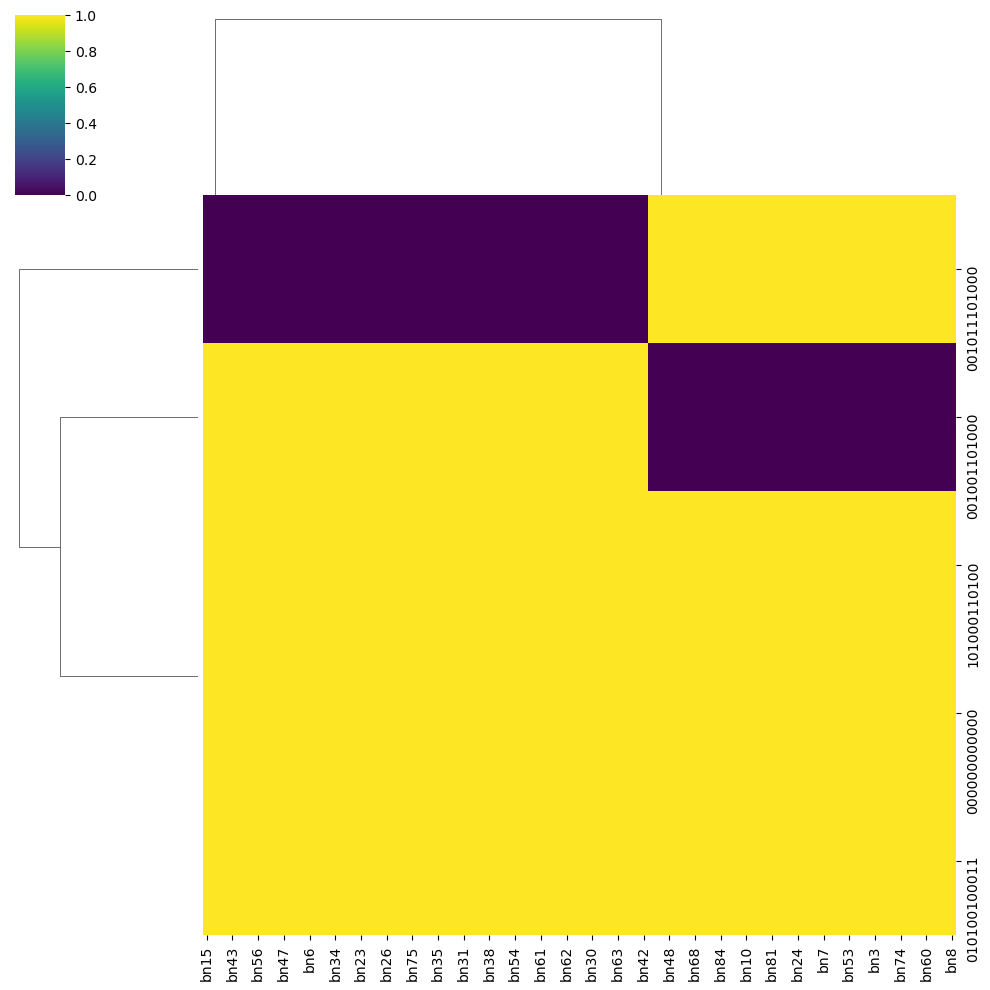

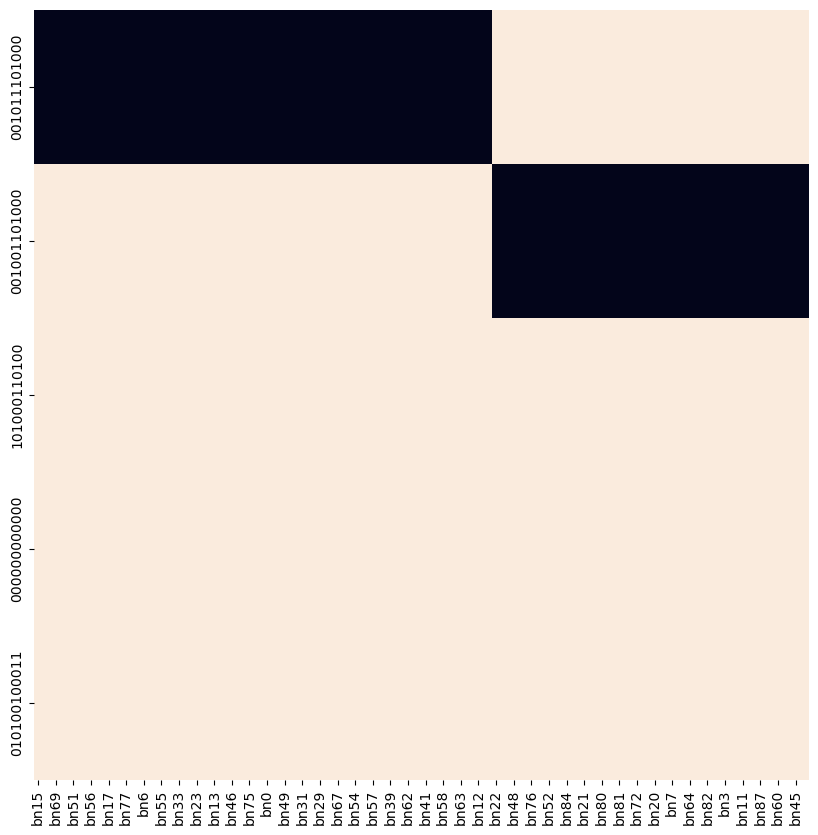

In [4]:
# Create the clustermap
clustermap = sns.clustermap(model.attractor.attractors_df, 
                            cmap='viridis', vmax=1, vmin=0, figsize=(10,10))

# Get the row and column order from the clustermap
row_order = clustermap.dendrogram_row.reordered_ind
col_order = clustermap.dendrogram_col.reordered_ind

# Reorder the dataframe
reordered_df = model.attractor.attractors_df.iloc[row_order, col_order]

# Plot the heatmap with the reordered dataframe without color bar
plt.figure(figsize=(10,10))
sns.heatmap(reordered_df, 
            #cmap='viridis', 
            vmax=1, vmin=0, cbar=False)
#plt.savefig('/home/spankaew/Git/BooleanBenchmark/figures/toy_reprogramming_AttractorHeatmap.pdf')
plt.show()
plt.close()

From `logic_ensemble` object -> you can define simulation parameters and initial condition of the simulation directly. The simulation gives the node activity at each simulation time that is stored in the object called `.simulation.simulation_df`

# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

In [5]:
# setup initial state for the simulation
initial_state = {'Pax6':1}

In [6]:
model.simulation.update_parameters(max_time = 20, sample_count = 5000)
model.simulation.run_simulation(initial_state = initial_state)

Start simulation


100%|██████████| 88/88 [00:15<00:00,  5.60it/s]


Simulation completed


Trajectory object created


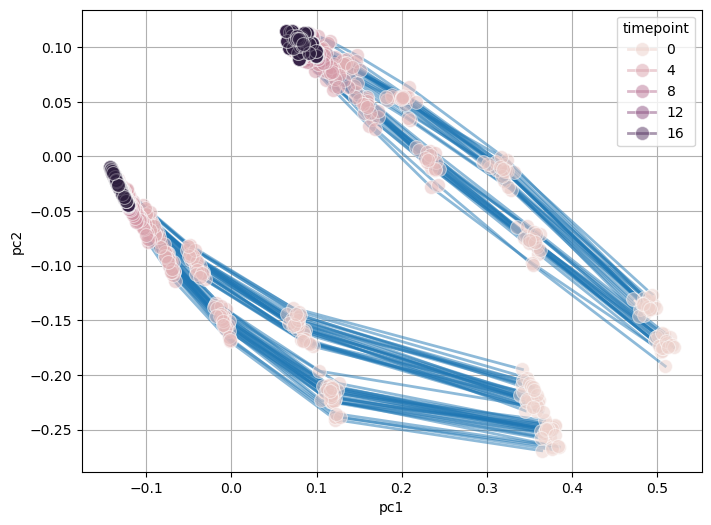

In [7]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

In [8]:
import numpy as np
# Setup the 
pca_df = model.trajectory.pca_df
pca_df.model_id = pca_df.model_id.astype('category')
model_name = pca_df.model_id.cat.categories

simulation_df = model.simulation.simulation_df
simulation_df.model_id = simulation_df.model_id.astype('category')
node_list = simulation_df.columns.drop(['timepoint','model_id'])

model_original_all = {}
for i in model_name:
    model_original = simulation_df.loc[simulation_df.model_id == i,node_list].values
    model_original_all[i] = np.array(model_original)
pca_all_trajectory = np.array(list(model_original_all.values()))

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


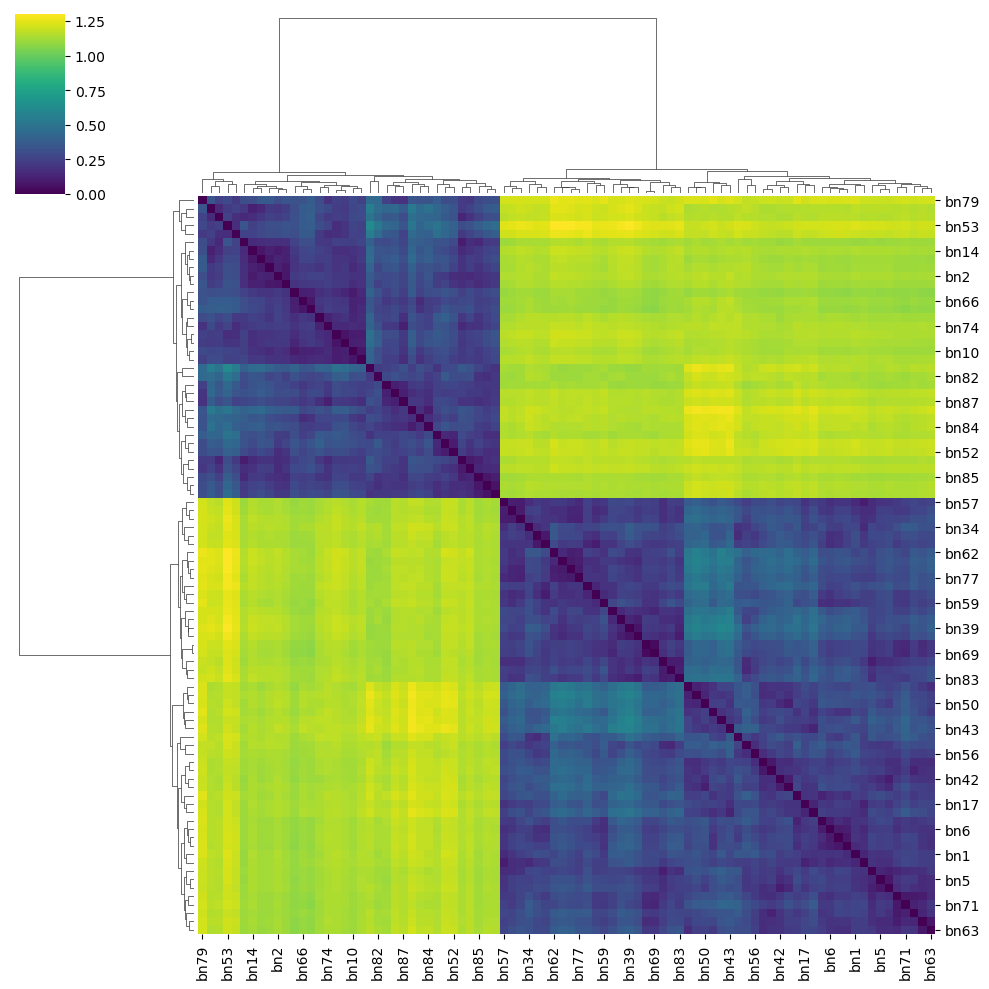

In [9]:
from tslearn.metrics import dtw

# Initialize an empty distance matrix
num_trajectories = len(pca_all_trajectory)
distance_matrix = np.zeros((num_trajectories, num_trajectories))

# Calculate DTW distance for each pair of trajectories
for i in range(num_trajectories):
    for j in range(num_trajectories):
        distance_matrix[i, j] = dtw(pca_all_trajectory[i], pca_all_trajectory[j])

# Display the distance matrix
distance_matrix = pd.DataFrame(distance_matrix, index=model_name, columns=model_name)
sns.clustermap(distance_matrix, cmap='viridis', figsize=(10,10))

/tmp/ipykernel_9034/806984970.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


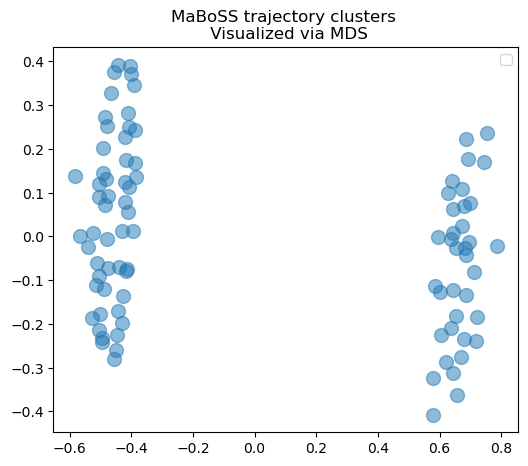

In [10]:
# Visualize clusters with MDS
from sklearn.manifold import MDS

# Visualize clusters with MDS
#distance_matrix = model.succession_diagram.distance_matrix
mds = MDS(dissimilarity='precomputed', random_state=12345)
coords = mds.fit_transform(distance_matrix)

plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s = 100)
plt.legend()
plt.title('MaBoSS trajectory clusters \n Visualized via MDS')
plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/BonesisTutorial_trajMDS.pdf')

plt.show()

plt.close()

Euclidean k-means
0.010 --> 0.006 --> 0.006 --> 


/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/spankaew/Git/astrologics/astrologics/trajectory_clustering.py:222: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pca_df['kmean_cluster'] = pca_df['kmean_cluster'].replace(cluster_dict)
/home/spankaew/Git/astrologics/astrologics/trajectory_clustering.py:222: FutureWarning: The behavior of Series.replace (and D

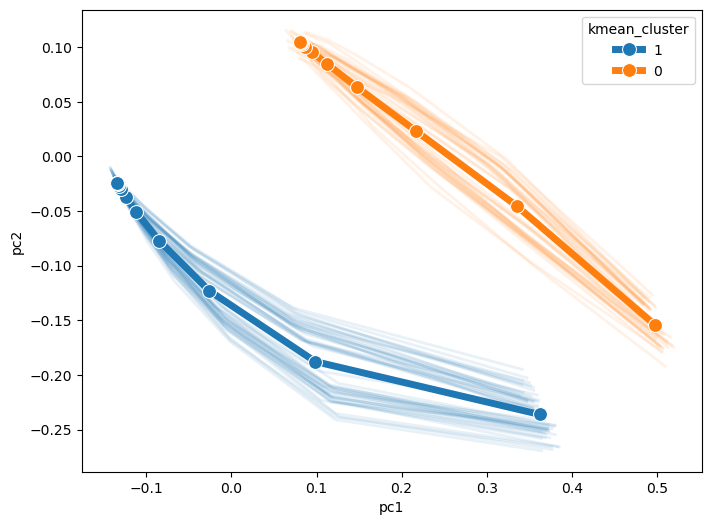

In [12]:
model.trajectory.calculate_kmean_cluster(n_cluster=2)
model.trajectory.plot_trajectory_cluster()

Succession diagram object created
Calculating Succession Diagrams


100%|██████████| 88/88 [00:10<00:00,  8.76it/s]


Succession Diagrams calculated


100%|██████████| 88/88 [00:00<00:00, 236.65it/s]


Creating SD networks


100%|██████████| 88/88 [00:00<00:00, 360.92it/s]


SD networks created


  0%|          | 0/88 [00:00<?, ?it/s]/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/netrd/utilities/graph.py:74: RuntimeWarning: Coercing directed graph to undirected.
  warnings.warn("Coercing directed graph to undirected.", RuntimeWarning)
100%|██████████| 88/88 [00:05<00:00, 17.41it/s]
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


SD networks distance calculated


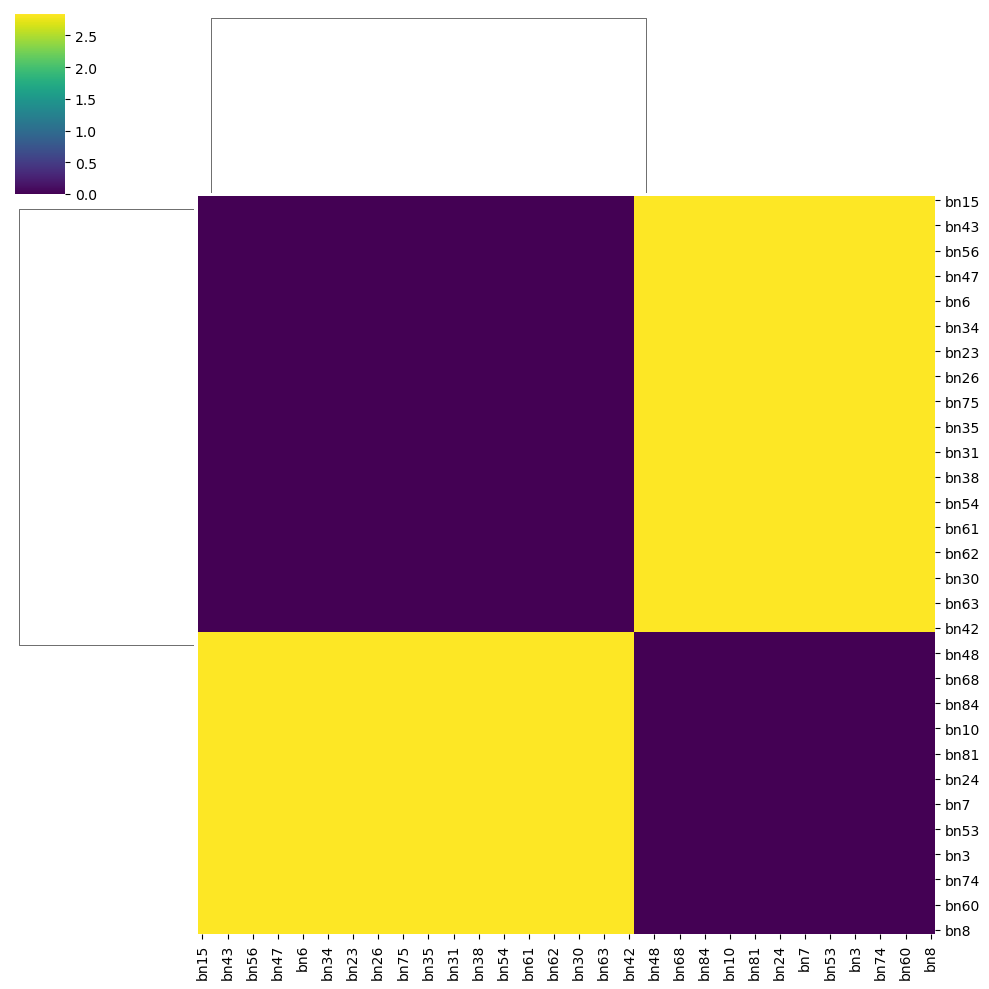

In [13]:
model.create_succession_diagram()
model.succession_diagram.calculate_succession_diagram()
model.succession_diagram.calculate_sd_states()
model.succession_diagram.create_sd_networks()
model.succession_diagram.calculate_sdnet_distance()
sns.clustermap(model.succession_diagram.distance_matrix, cmap='viridis')

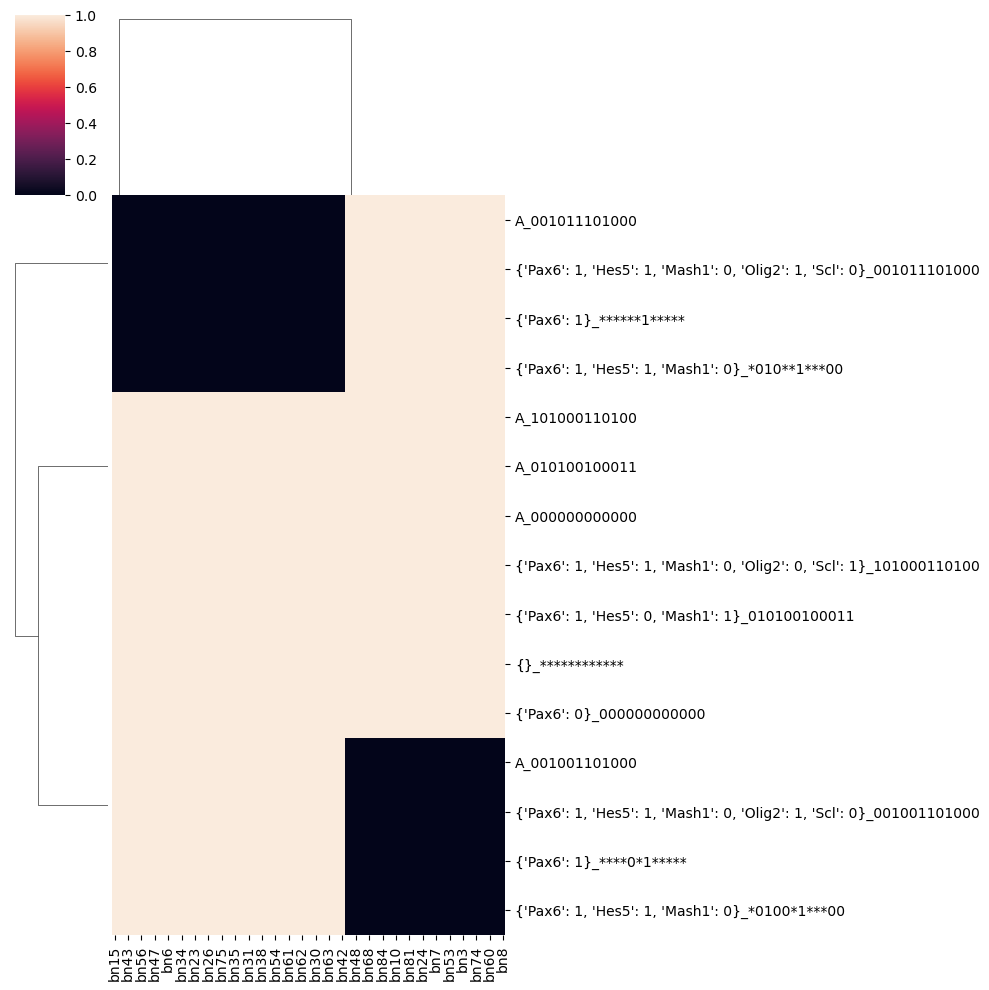

In [14]:
sns.clustermap(model.succession_diagram.states_bin)

/tmp/ipykernel_9034/788440816.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


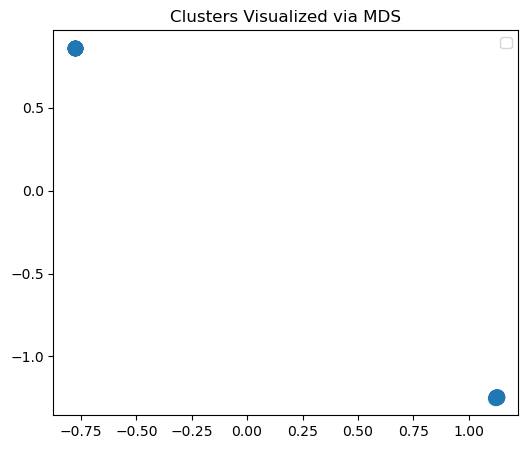

In [15]:
# Visualize clusters with MDS
distance_matrix_2 = model.succession_diagram.distance_matrix
mds = MDS(dissimilarity='precomputed', random_state=12345)
coords = mds.fit_transform(distance_matrix_2)

plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s = 100)
plt.legend()
plt.title('Clusters Visualized via MDS')
plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/BonesisTutorial_sdMDS.pdf')

plt.show()

plt.close()

In [16]:
distance_matrix = distance_matrix.loc[model_name, model_name]
distances_1 = distance_matrix.where(np.triu(np.ones(distance_matrix.shape ,dtype = bool), k=1)).stack().reset_index()
distances_1['combined'] = distances_1['level_0'] + "_" + distances_1['level_1']
distances_1.set_index('combined', inplace=True)
distances_1.drop(columns=['level_0', 'level_1'], inplace=True)
distances_1.columns = ['traj_distance']

In [17]:
distance_matrix_2 = distance_matrix_2.loc[model_name, model_name]
distances_2 = distance_matrix_2.where(np.triu(np.ones(distance_matrix_2.shape ,dtype = bool), k=1)).stack().reset_index()
distances_2['combined'] = distances_2['level_0'] + "_" + distances_2['level_1']
distances_2.set_index('combined', inplace=True)
distances_2.drop(columns=['level_0', 'level_1'], inplace=True)
distances_2.columns = ['sd_distance']

Correlation between the two distance matrices: 0.9866824830750246
P-value: 0.0


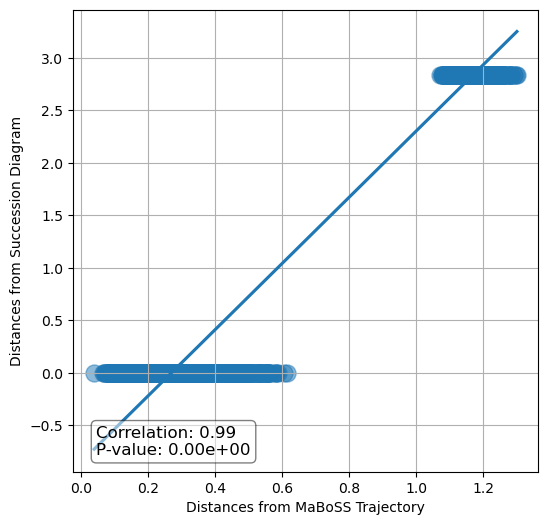

In [18]:
from scipy.stats import pearsonr

# Extract the upper triangular parts of the distance matrices (excluding the diagonal)
distance_matrix = distance_matrix.loc[model_name, model_name]
distances_1 = distance_matrix.where(np.triu(np.ones(distance_matrix.shape, dtype='bool'), k=1)).stack()

distance_matrix_2 = distance_matrix_2.loc[model_name, model_name]
distances_2 = distance_matrix_2.where(np.triu(np.ones(distance_matrix_2.shape, dtype='bool'), k=1)).stack()

# Compute the correlation and p-value
correlation, p_value = pearsonr(distances_1.values, distances_2.values)

# Print the correlation and p-value
print(f"Correlation between the two distance matrices: {correlation}")
print(f"P-value: {p_value}")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(6, 6))
sns.regplot(x=distances_1.values, y=distances_2.values, scatter_kws={'s': 150, 'alpha': 0.5})
plt.xlabel("Distances from MaBoSS Trajectory")
plt.ylabel("Distances from Succession Diagram")
plt.grid(True)

# Add a box label with correlation and p-value
plt.text(
    0.05, 0.1, 
    f"Correlation: {correlation:.2f}\nP-value: {p_value:.2e}", 
    transform=plt.gca().transAxes, 
    fontsize=12, 
    verticalalignment='top', 
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.5)
)

plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/BonesisTutorial_distCorr.pdf')

plt.show()

plt.close()

# Create logic function matrix
In this part of the script, we load models' logic function into a matrix. This matrix can then be transformed into a Disjunctive Normal Form (DNF) which allow us to identify clause of components that can activate each node. 

In [21]:
model.create_logic()
model.logic.model_logic
model.logic.create_flattend_logic_clause()

Loading models logics


100%|██████████| 88/88 [00:00<00:00, 1350.42it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 2641.74it/s]

Logic object created
Flatten models logic clauses



100%|██████████| 88/88 [00:00<00:00, 951285.44it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1659.71it/s]

Flattend logic clause created


PCA calculated


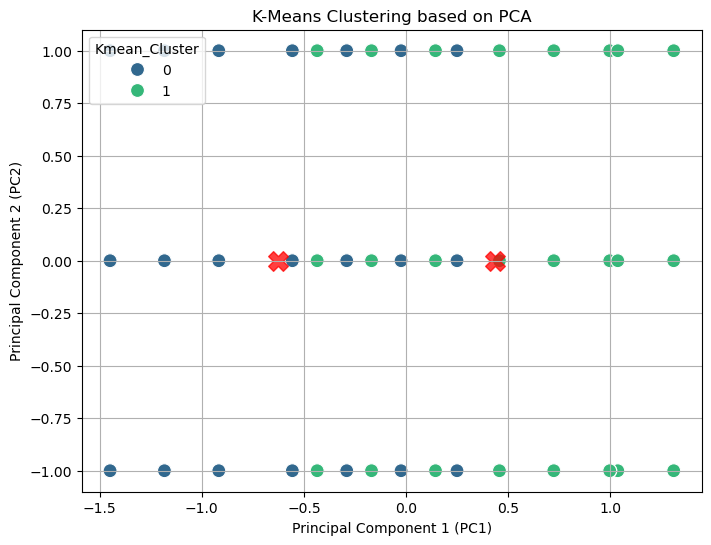

In [22]:
model.logic.calculate_logic_pca()
model.logic.calculate_kmean_cluster(num_cluster = 2)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
model_cluster = pd.Series(model.logic.pca_df.Kmean_Cluster)
model_logic = model.logic.model_logic

var_logic_clust = pd.DataFrame()
for i in list(model_cluster.unique()):
    model_logic_sub = model_logic.transpose().loc[list(model_cluster.index[model_cluster == i])]
    #model_logic_sub = model_logic_sub.drop(['logic_cluster'], axis = 1)
    var_logic_length = []
    for j in model_logic_sub.columns:
        num_logic = model_logic_sub[j].value_counts().size
        var_logic_length.append(num_logic)
    var_logic_length = pd.DataFrame(var_logic_length, columns = ['logic_length'], index = model_logic_sub.columns)
    var_logic_clust = pd.concat([var_logic_clust, var_logic_length], axis = 1, ignore_index = False)
var_logic_clust.columns = list(model_cluster.unique())

model_logic_t= model_logic.transpose()

# Ordinal encoding
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)

sort_index = encoded_df.max().sort_values().index

var_logic_clust= var_logic_clust.loc[sort_index] 

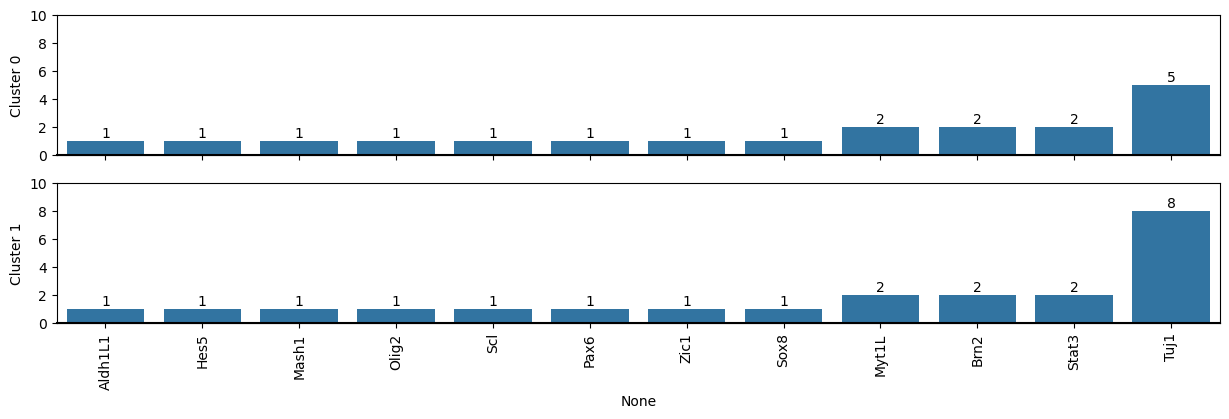

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(15, 4), sharex=True)
plt.ylim(0, 65)

for i in range(2):
    sns.barplot(x=var_logic_clust.index, y=var_logic_clust[i], ax=axes[i])
    axes[i].axhline(0, color="k", clip_on=False)
    axes[i].set_ylabel(f"Cluster {i}")
    axes[i].bar_label(axes[i].containers[0], fontsize=10)
    axes[i].set_ylim(0, 10)

plt.xticks(rotation=90)
plt.show()

In [25]:
from scipy.stats import chi2_contingency

test = model.logic.logic_clause_flattend
test = test.transpose()
test['group'] = test.index.map(model.trajectory.cluster_dict)
# Assuming 'df' is a DataFrame with samples as rows and features as columns,
# and 'group' is a column indicating group membership.

# Step 1: Identify constant features.
constant_features = [col for col in test.columns if col != 'group' and test[col].nunique() == 1]

# Step 2 & 3: For non-constant features, perform chi-square test.
marker_features = []
varied_features = []

for col in test.columns:
    if col == 'group' or col in constant_features:
        continue
    contingency_table = pd.crosstab(test[col], test['group'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < 0.001:  # Adjust threshold as needed after multiple testing correction.
        marker_features.append(col)
    else:
        varied_features.append(col)

print("Constant features:", constant_features)
print("Varied but not markers:", varied_features)
print("Key marker features:", marker_features)

Constant features: ['Aldh1L1_(Stat3)', 'Hes5_(!Mash1 & Pax6)', 'Mash1_(!Hes5 & Pax6)', 'Olig2_(Hes5 & !Scl)', 'Pax6_(Pax6)', 'Scl_(Hes5 & !Olig2)', 'Sox8_(Olig2)', 'Zic1_(Mash1)']
Varied but not markers: ['Brn2_(Mash1)', 'Stat3_(Scl)', 'Tuj1_(Brn2)', 'Tuj1_(Myt1L & Zic1)', 'Brn2_(Mash1 & !Olig2)', 'Stat3_(Hes5 & Scl)', 'Tuj1_(Zic1)', 'Tuj1_(Brn2 & Myt1L)', 'Tuj1_(Brn2 & Zic1)']
Key marker features: ['Myt1L_(Olig2)', 'Myt1L_(0)', 'Tuj1_(Myt1L)']


In [26]:
marker_features

['Myt1L_(Olig2)', 'Myt1L_(0)', 'Tuj1_(Myt1L)']

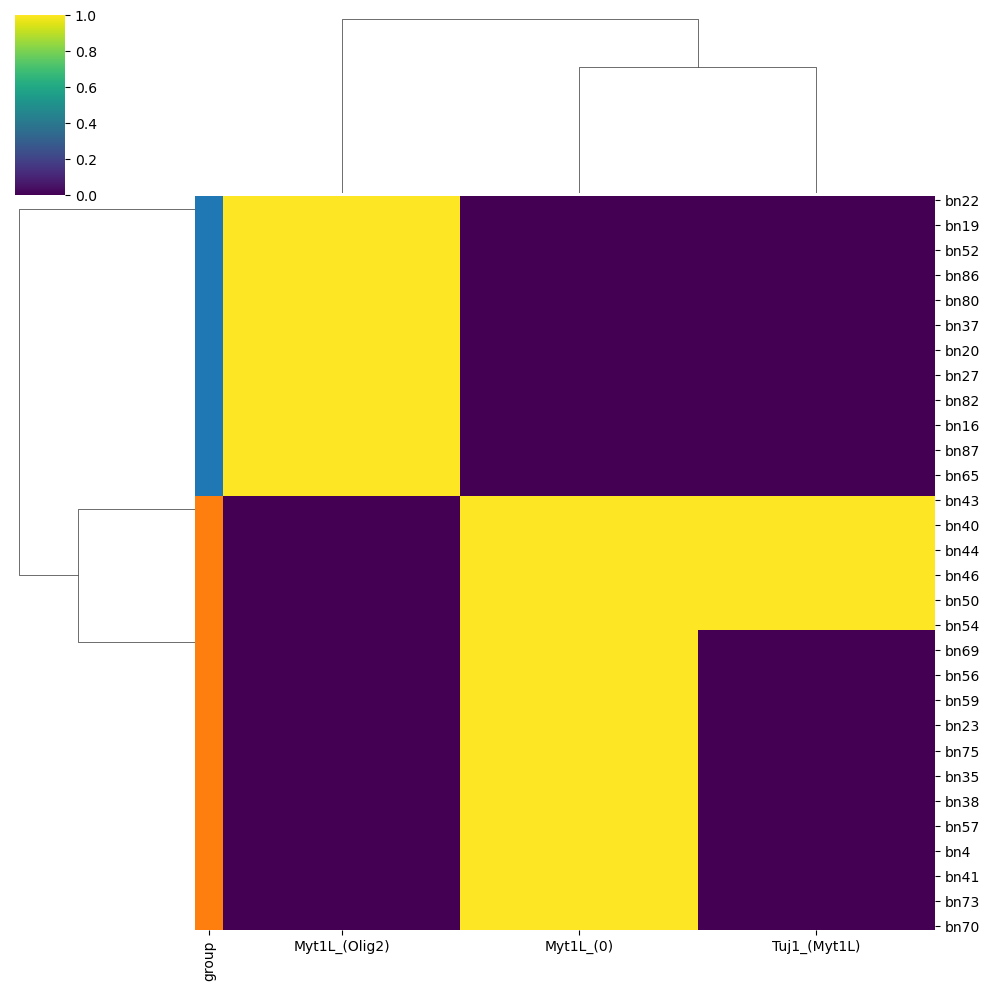

In [28]:
# Create a color palette for the groups
unique_groups = test['group'].unique()
palette = sns.color_palette("tab10", len(unique_groups))
group_colors = test['group'].map(dict(zip(unique_groups, palette)))

# Create the clustermap with row colors
sns.clustermap(test[marker_features], cmap='viridis', figsize=(10, 10), row_colors=group_colors)

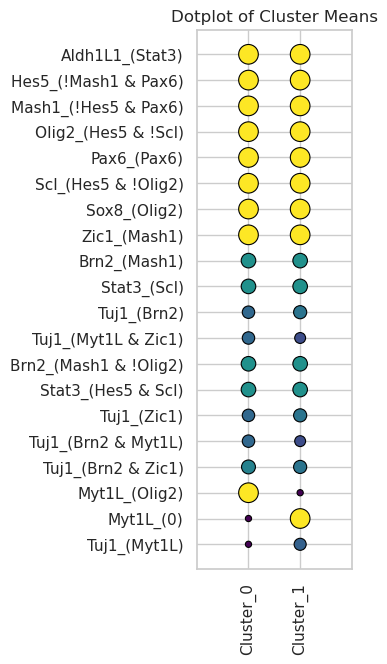

In [41]:
model_cluster = pd.Series(model.trajectory.cluster_dict)

result_df = pd.DataFrame()

for cluster in model.trajectory.cluster_dict.values():
    cluster_id = [key for key, value in model.trajectory.cluster_dict.items() if value == cluster]
    cluster_mtx = test.loc[:, test.columns.isin(cluster_id)]
    cluster_mean = cluster_mtx.mean(axis=1)
    result_df[f'Cluster_{cluster}'] = cluster_mean

# Convert the result_df to a long format for easier plotting with seaborn
result_df = result_df.loc[constant_features + varied_features + marker_features,:]
result_long_df = result_df.reset_index().melt(id_vars='index', var_name='Cluster', value_name='Value')

# Create the dot plot
plt.figure(figsize=(2, 7))
sns.set_theme(style="whitegrid")
dotplot = sns.scatterplot(data=result_long_df, 
                          x=pd.Categorical(result_long_df['Cluster'], categories=['Cluster_0', 'Cluster_1'], ordered=True), 
                          y='index', 
                          size='Value', hue='Value', 
                          palette='viridis', sizes=(20, 200), legend=None,
                          edgecolor='black', linewidth=0.8)

# Customize the plot
plt.title('Dotplot of Cluster Means')
#plt.xlabel('Cluster')
plt.ylabel(None)
plt.xticks(rotation=90)
plt.xlim(-1,2)
plt.show()

plt.savefig('/home/spankaew/Git/astrologics/figures/BonesisTutorial_traj_dotplot.pdf')
plt.close()

SD networks clustered


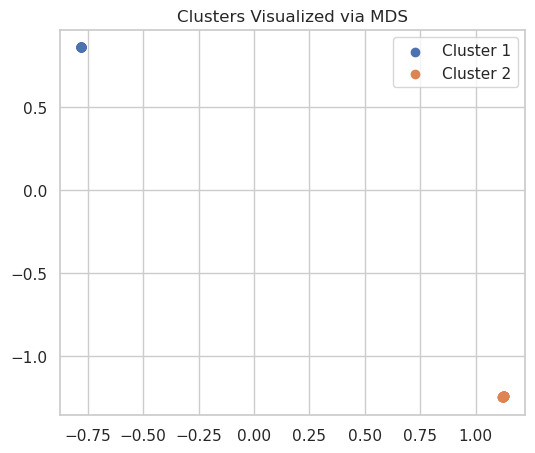

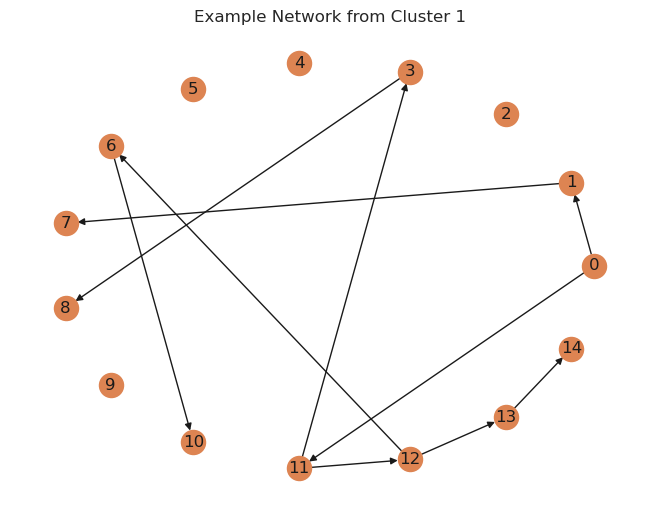

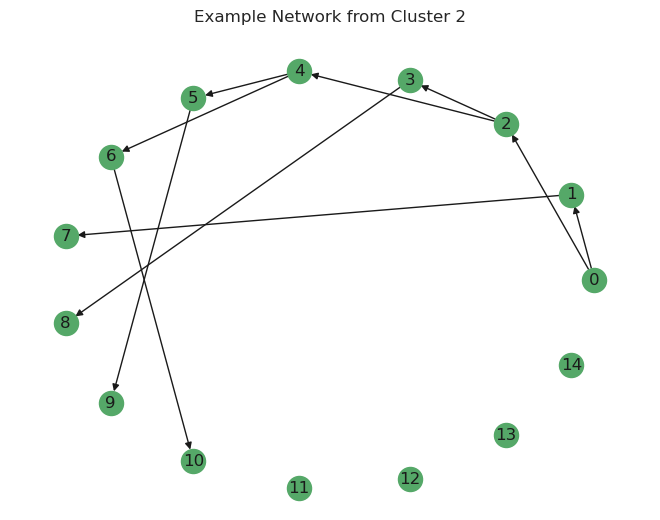

In [43]:
model.succession_diagram.cluster_sdnet(n_cluster = 2)
model.succession_diagram.plot_sdnet_cluster()

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [46]:
model_cluster

bn0     1
bn1     1
bn10    0
bn11    0
bn12    1
       ..
bn84    0
bn85    0
bn86    0
bn87    0
bn9     1
Length: 88, dtype: int64

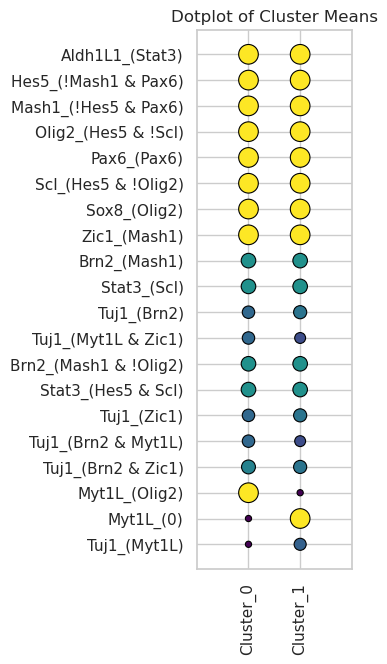

In [47]:
model_cluster = pd.Series(model.succession_diagram.clusters)

result_df = pd.DataFrame()

for cluster in model.trajectory.cluster_dict.values():
    cluster_id = [key for key, value in model.trajectory.cluster_dict.items() if value == cluster]
    cluster_mtx = test.loc[:, test.columns.isin(cluster_id)]
    cluster_mean = cluster_mtx.mean(axis=1)
    result_df[f'Cluster_{cluster}'] = cluster_mean

# Convert the result_df to a long format for easier plotting with seaborn
result_df = result_df.loc[constant_features + varied_features + marker_features,:]
result_long_df = result_df.reset_index().melt(id_vars='index', var_name='Cluster', value_name='Value')

# Create the dot plot
plt.figure(figsize=(2, 7))
sns.set_theme(style="whitegrid")
dotplot = sns.scatterplot(data=result_long_df, 
                          x=pd.Categorical(result_long_df['Cluster'], categories=['Cluster_0', 'Cluster_1'], ordered=True), 
                          y='index', 
                          size='Value', hue='Value', 
                          palette='viridis', sizes=(20, 200), legend=None,
                          edgecolor='black', linewidth=0.8)

# Customize the plot
plt.title('Dotplot of Cluster Means')
#plt.xlabel('Cluster')
plt.ylabel(None)
plt.xticks(rotation=90)
plt.xlim(-1,2)
plt.show()

plt.savefig('/home/spankaew/Git/astrologics/figures/BonesisTutorial_traj_dotplot.pdf')
plt.close()